In [2]:
!pip install datasets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00


In [3]:
pip install transformers datasets nltk rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=8f1472ba456683019c117c29fa1044cdb947f2f8106f8eafc2cab634284abbe4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [4]:
!pip install py7zr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 32.6 MB/s eta 0:00:00


In [5]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

 # Exploratory Data Analysis:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})
{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}


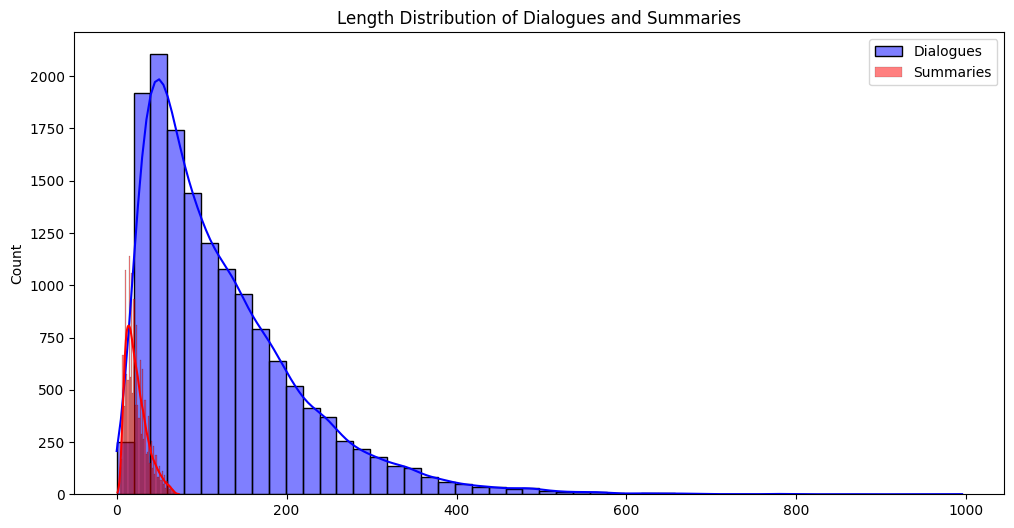

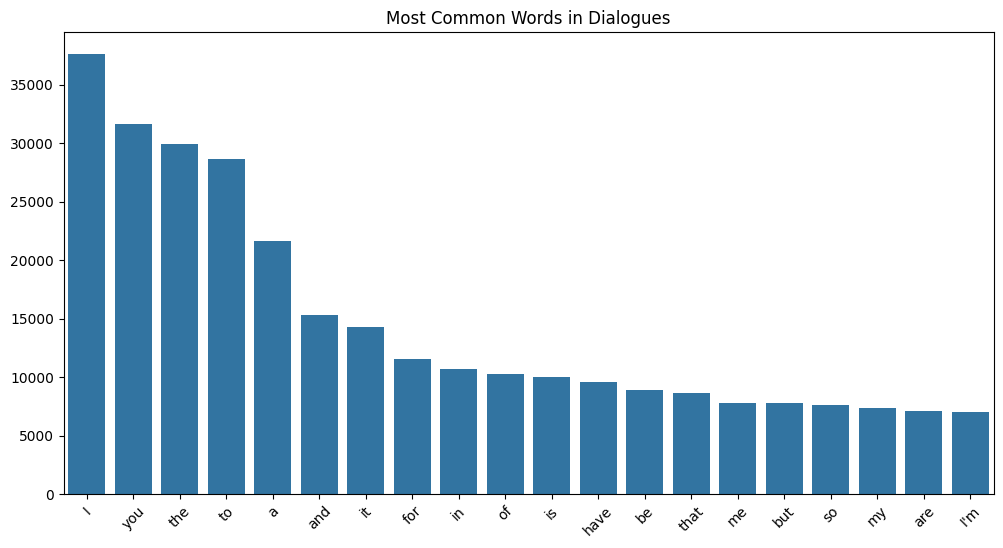

In [7]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import seaborn as sns

# Download NLTK tokenizer
nltk.download('punkt')

# Load the SAMSum dataset
dataset = load_dataset("samsum")

# Explore the dataset
print(dataset)

# Display sample data
print(dataset['train'][0])

# Analyze the length distribution
dialogue_lengths = [len(nltk.word_tokenize(dialogue)) for dialogue in dataset['train']['dialogue']]
summary_lengths = [len(nltk.word_tokenize(summary)) for summary in dataset['train']['summary']]

plt.figure(figsize=(12, 6))
sns.histplot(dialogue_lengths, bins=50, label="Dialogues", color='blue', kde=True)
sns.histplot(summary_lengths, bins=50, label="Summaries", color='red', kde=True)
plt.legend()
plt.title("Length Distribution of Dialogues and Summaries")
plt.show()

# Find most common words
all_words = " ".join(dataset['train']['dialogue']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Most Common Words in Dialogues")
plt.show()


# 3. Inference with Pre-trained Models:

In [8]:
from transformers import pipeline

# Select three pre-trained models
models = [
    "facebook/bart-large-cnn",
    "t5-large",
    "google/pegasus-xsum"
]

summarizers = {model: pipeline("summarization", model=model) for model in models}

# Generate summaries for a sample dialogue
sample_dialogue = dataset['train'][0]['dialogue']

for model, summarizer in summarizers.items():
    print(f"\nModel: {model}")
    summary = summarizer(sample_dialogue, max_length=50, min_length=10, do_sample=False)
    print("Generated Summary:", summary[0]['summary_text'])


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 50, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)



Model: facebook/bart-large-cnn


Your max_length is set to 50, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Generated Summary: Amanda: I baked  cookies. Do you want some? Jerry: Sure!

Model: t5-large


Your max_length is set to 50, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Generated Summary: Amanda: i baked cookies. do you want some? Jerry: sure! :-)

Model: google/pegasus-xsum
Generated Summary: Jerry: Amanda, I'm sorry, I'm late.


# : Implement Lead-3 Baseline

In [9]:
from nltk.tokenize import sent_tokenize

def lead_3_baseline(dialogue):
    sentences = sent_tokenize(dialogue)
    return " ".join(sentences[:3])

# Apply lead-3 baseline
baseline_summary = lead_3_baseline(sample_dialogue)
print("\nLead-3 Baseline Summary:", baseline_summary)



Lead-3 Baseline Summary: Amanda: I baked  cookies. Do you want some? Jerry: Sure!


In [10]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Evaluate models and baseline
for model, summarizer in summarizers.items():
    generated_summary = summarizer(sample_dialogue, max_length=50, min_length=10, do_sample=False)[0]['summary_text']
    scores = scorer.score(dataset['train'][0]['summary'], generated_summary)
    print(f"\n{model} ROUGE Scores:", scores)

# Evaluate Lead-3 baseline
baseline_scores = scorer.score(dataset['train'][0]['summary'], baseline_summary)
print("\nLead-3 Baseline ROUGE Scores:", baseline_scores)


Your max_length is set to 50, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 50, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)



facebook/bart-large-cnn ROUGE Scores: {'rouge1': Score(precision=0.5, recall=0.5555555555555556, fmeasure=0.5263157894736842), 'rouge2': Score(precision=0.1111111111111111, recall=0.125, fmeasure=0.11764705882352941), 'rougeL': Score(precision=0.4, recall=0.4444444444444444, fmeasure=0.4210526315789474)}


Your max_length is set to 50, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)



t5-large ROUGE Scores: {'rouge1': Score(precision=0.5, recall=0.5555555555555556, fmeasure=0.5263157894736842), 'rouge2': Score(precision=0.1111111111111111, recall=0.125, fmeasure=0.11764705882352941), 'rougeL': Score(precision=0.4, recall=0.4444444444444444, fmeasure=0.4210526315789474)}

google/pegasus-xsum ROUGE Scores: {'rouge1': Score(precision=0.25, recall=0.2222222222222222, fmeasure=0.23529411764705882), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.125, recall=0.1111111111111111, fmeasure=0.11764705882352941)}

Lead-3 Baseline ROUGE Scores: {'rouge1': Score(precision=0.5, recall=0.5555555555555556, fmeasure=0.5263157894736842), 'rouge2': Score(precision=0.1111111111111111, recall=0.125, fmeasure=0.11764705882352941), 'rougeL': Score(precision=0.4, recall=0.4444444444444444, fmeasure=0.4210526315789474)}


# : Fine-Tune a Model

In [11]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer
import torch

# Select a model for fine-tuning
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Tokenize data
def preprocess_function(examples):
    inputs = tokenizer(examples["dialogue"], max_length=512, truncation=True, padding="max_length")
    targets = tokenizer(examples["summary"], max_length=128, truncation=True, padding="max_length")
    inputs["labels"] = targets["input_ids"]
    return inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Set training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=100,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

# Train the model
trainer.train()


Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.321800,0.358710
2,0.224500,0.340783
3,0.146300,0.366875


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=22098, training_loss=0.2565921901178442, metrics={'train_runtime': 3519.3764, 'train_samples_per_second': 12.558, 'train_steps_per_second': 6.279, 'total_flos': 4.788867749747098e+16, 'train_loss': 0.2565921901178442, 'epoch': 3.0})

In [12]:
!pip install evaluate rouge-score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00


In [13]:
!pip install evaluate rouge-score


In [14]:
!pip install rouge-score


In [15]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)  # Move model to GPU if available

def generate_summary(dialogue):
    inputs = tokenizer(dialogue, return_tensors="pt", truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50, min_length=10, do_sample=False)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Test fine-tuned model
fine_tuned_summary = generate_summary(sample_dialogue)
print("\nFine-Tuned Model Summary:", fine_tuned_summary)



Fine-Tuned Model Summary: Amanda baked cookies and will bring Jerry some tomorrow.


# 6. Evaluation and Analysis:

In [16]:
from rouge_score import rouge_scorer
import numpy as np

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def evaluate_model(dataset, model, tokenizer):
    rouge_scores = {"rouge1": [], "rouge2": [], "rougeL": []}

    for example in dataset:
        dialogue = example["dialogue"]
        reference_summary = example["summary"]

        # Generate summary
        inputs = tokenizer(dialogue, return_tensors="pt", truncation=True, max_length=512).to(device)
        with torch.no_grad():
            output = model.generate(**inputs, max_length=50, min_length=10, do_sample=False)
        generated_summary = tokenizer.decode(output[0], skip_special_tokens=True)

        # Compute ROUGE scores
        scores = scorer.score(reference_summary, generated_summary)
        for metric in rouge_scores.keys():
            rouge_scores[metric].append(scores[metric].fmeasure)

    # Compute average ROUGE scores
    avg_scores = {metric: np.mean(scores) for metric, scores in rouge_scores.items()}
    return avg_scores

# Evaluate fine-tuned model on test set
fine_tuned_scores = evaluate_model(dataset["test"], model, tokenizer)
print("\nFine-Tuned Model ROUGE Scores:", fine_tuned_scores)



Fine-Tuned Model ROUGE Scores: {'rouge1': np.float64(0.5141892691651014), 'rouge2': np.float64(0.2592408377157442), 'rougeL': np.float64(0.4187479771376824)}


In [17]:
# Load pre-trained model again for comparison
pretrained_model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn").to(device)

# Evaluate pre-trained model on test set
pretrained_scores = evaluate_model(dataset["test"], pretrained_model, tokenizer)
print("\nPre-Fine-Tuned Model ROUGE Scores:", pretrained_scores)

# Compare results
print("\nPerformance Improvement After Fine-Tuning:")
for metric in fine_tuned_scores.keys():
    improvement = fine_tuned_scores[metric] - pretrained_scores[metric]
    print(f"{metric.upper()} Improvement: {improvement:.4f}")



Pre-Fine-Tuned Model ROUGE Scores: {'rouge1': np.float64(0.33667266292281267), 'rouge2': np.float64(0.10597125105489279), 'rougeL': np.float64(0.2598539577350674)}

Performance Improvement After Fine-Tuning:
ROUGE1 Improvement: 0.1775
ROUGE2 Improvement: 0.1533
ROUGEL Improvement: 0.1589


In [18]:
# Sample test dialogue
sample_dialogue = dataset["test"][0]["dialogue"]
reference_summary = dataset["test"][0]["summary"]

# Generate pre-trained model summary
inputs = tokenizer(sample_dialogue, return_tensors="pt", truncation=True, max_length=512).to(device)
with torch.no_grad():
    output = pretrained_model.generate(**inputs, max_length=50, min_length=10, do_sample=False)
pretrained_summary = tokenizer.decode(output[0], skip_special_tokens=True)

# Generate fine-tuned model summary
with torch.no_grad():
    output = model.generate(**inputs, max_length=50, min_length=10, do_sample=False)
fine_tuned_summary = tokenizer.decode(output[0], skip_special_tokens=True)

# Print results
print("\nOriginal Dialogue:\n", sample_dialogue)
print("\nReference Summary:\n", reference_summary)
print("\nPre-Fine-Tuned Model Summary:\n", pretrained_summary)
print("\nFine-Tuned Model Summary:\n", fine_tuned_summary)



Original Dialogue:
 Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Reference Summary:
 Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.

Pre-Fine-Tuned Model Summary:
 Hannah: Hey, do you have Betty's number? Amanda: Lemme check. Hannah: Ask Larry. Amanda: He called her last time we were at the park together.

Fine-Tuned Model Summary:
 Hannah is looking for Betty's number. Amanda suggests Hannah to ask Larry.
